In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

Read in PGA data

In [3]:
df=pd.read_csv("ASA All PGA Raw Data - Tourn Level.csv.txt")


Split data frame into features and label

In [6]:
#Create binary variable for whether or not someone placed in top 10
df['Place_Binary'] =np.where(df['final position']<=10,1,0)

#create dataframe for only needed variable and drop any missing
feature_cols = ['sg_putt','sg_arg','sg_app','sg_ott','sg_t2g','sg_total']
trunc=df[feature_cols + ['Place_Binary']].dropna()

X = trunc[feature_cols] # Features
y=trunc['Place_Binary']
counts=Counter(y)
counts


Counter({0: 22276, 1: 2463})

In [9]:
X.head()

,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,1.73,0.10,0.32,-0.62,-0.20,1.53
1,1.82,0.58,-2.26,-0.51,-2.19,-0.37
2,-0.35,-0.62,-1.95,0.57,-1.99,-2.34
4,1.73,-0.46,-5.50,-1.00,-6.96,-5.23
5,-0.50,0.72,-0.45,-0.66,-0.39,-0.89


Split into test and train

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

Build Rain Forest Model

In [11]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

Check accuracy

In [13]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9601185664241444


Let's predict result if someone shoots on par (result indicates the person would most likely not be in top 10)

In [14]:
clf.predict([[0, 0, 0, 0,0,0]])

array([0])

Let's see which features are the most important in modeling the outcome

In [17]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp

sg_total    0.476307
sg_t2g      0.186821
sg_putt     0.126493
sg_app      0.081955
sg_ott      0.065660
sg_arg      0.062763
dtype: float64

Visualize importance of features

No handles with labels found to put in legend.


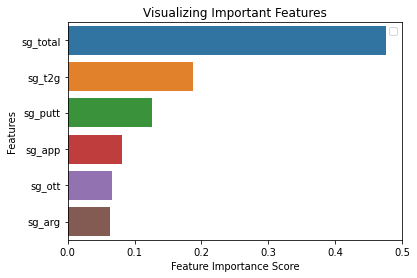

In [19]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

I'm going to remove everything but sg_total because they don't contribute as much and I think there is multicollinearity occuring

In [28]:
#create dataframe for only needed variable and drop any missing
feature_cols = ['sg_total']
trunc=df[feature_cols + ['Place_Binary']].dropna()

X = trunc[feature_cols] # Features
y=trunc['Place_Binary']
counts=Counter(y)
counts

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

Create model and look at accuracy

In [29]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9606575047157101


In [ ]:
Want to look at model without sg_total

In [30]:
#create dataframe for only needed variable and drop any missing
feature_cols = ['sg_putt','sg_arg','sg_app','sg_ott','sg_t2g']
trunc=df[feature_cols + ['Place_Binary']].dropna()

X = trunc[feature_cols] # Features
y=trunc['Place_Binary']
counts=Counter(y)
counts

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [31]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9576933441120992


Want to look at feature selection

In [32]:
feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp

sg_putt    0.350390
sg_t2g     0.341367
sg_app     0.129231
sg_ott     0.093109
sg_arg     0.085903
dtype: float64

No handles with labels found to put in legend.


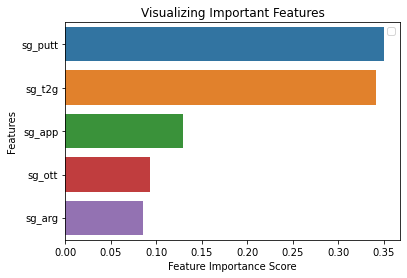

In [33]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Drop out the variables that contribute the least to the model

In [70]:
#create dataframe for only needed variable and drop any missing
feature_cols = ['sg_putt','sg_t2g','sg_app','sg_ott']
trunc=df[feature_cols + ['Place_Binary']].dropna()

X = trunc[feature_cols] # Features
y=trunc['Place_Binary']
counts=Counter(y)
counts

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [81]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9582322824036648


In [83]:
#create dataframe for only needed variable and drop any missing
feature_cols = ['sg_putt','sg_t2g','sg_app']
trunc=df[feature_cols + ['Place_Binary']].dropna()

X = trunc[feature_cols] # Features
y=trunc['Place_Binary']
counts=Counter(y)
counts

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [84]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9564807329560765


In [85]:
#create dataframe for only needed variable and drop any missing
feature_cols = ['sg_putt','sg_t2g']
trunc=df[feature_cols + ['Place_Binary']].dropna()

X = trunc[feature_cols] # Features
y=trunc['Place_Binary']
counts=Counter(y)
counts

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [88]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9537860414982484
